In [54]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

In [70]:
#data URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv 
#data is collected from 1960-2014

#loading data
df= pd.read_csv("~/Downloads/china_gdp.csv")
df.head(5)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [71]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


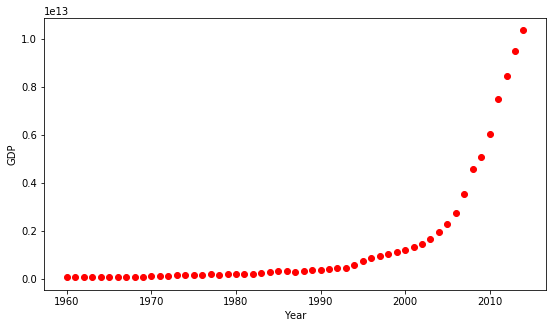

In [72]:
#plot the data

plt.figure(figsize= (9,5))

x_data, y_data= (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

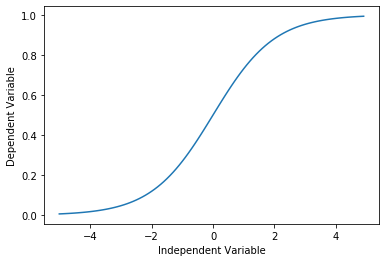

In [73]:
#Logistic function 
    #chosen for there is the exponential growh in the middle in scatter plot above

X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [74]:
#building regression model and initialize the parameters
def sigmoid(x, beta_1,beta_2):
    y=1/ (1+np.exp(- beta_1 *(x- beta_2)))
    return y 

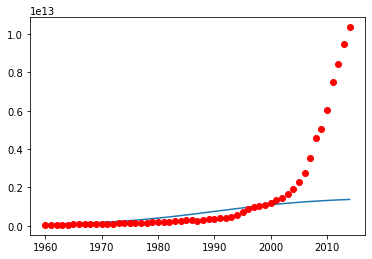

In [75]:
#sigmoid line to fit the data

beta_1= .1
beta_2= 1990

#logistic ufnciton
Y_pred= sigmoid(x_data, beta_1, beta_2)

#plot initial prediction against data points
plt.plot(x_data, Y_pred*1500000000000)
plt.plot(x_data, y_data, 'ro')


In [76]:
#normalizing data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [77]:
#Curve_fit used to find the best parameters for the fitted line

from scipy.optimize import curve_fit
popt, pcov= curve_fit(sigmoid,xdata,ydata)

In [78]:
print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = 690.453018, beta_2 = 0.997207


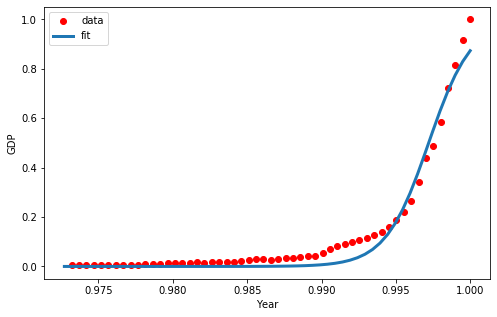

In [79]:
#ploting the regression model

x = np.linspace(1960, 2015, 55)
x = x/max(x) 
y = sigmoid(x, *popt)

plt.figure(figsize=(8,5)) #setting the fig size 

plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Calculation for the accuracy

In [80]:
#spliting data into train and test 
    
mask = np.random.rand(len(df)) < 0.8
train_x = xdata[mask]
train_y = ydata[mask]
test_x = xdata[~mask]
test_y = ydata[~mask]


In [85]:
#building model with train data
popt, pcov = curve_fit(sigmoid, train_x, train_y)

In [86]:
#predicting with test data
y_hat = sigmoid(test_x, *popt)

## Evaluation

In [87]:
#print out the evaluation
    #mean absolute error
print(np.mean(np.absolute(y_hat-test_y)))

0.181543366250767


In [88]:
#residual sum of squares(MSE)
print(np.mean(y_hat-test_y **2))

-0.10668014483892053


In [89]:
#importing sklearn r^2 score
from sklearn.metrics import r2_score

In [90]:
#print out value for r^2
print(r2_score(y_hat, test_y))

-7.014259969987129e+26
